<a href="https://colab.research.google.com/github/stormfireuttam/Major-Project/blob/main/03%20Lane%20Detection/02%20Advanced%20Lane%20Detection/BasicsOfCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basics of Calibration

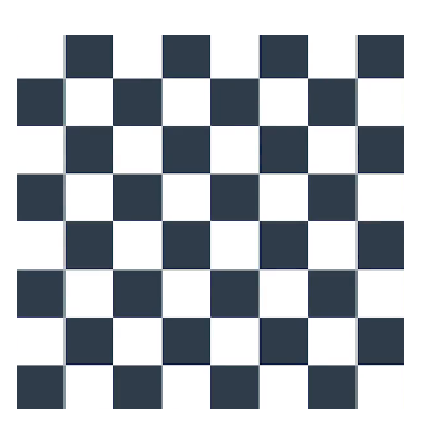

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

nx = 7
ny = 7
img = cv2.imread("/content/drive/MyDrive/GOOGLE COLAB NOTEBOOKS/Major Project/chess.png")
cv2_imshow(img)

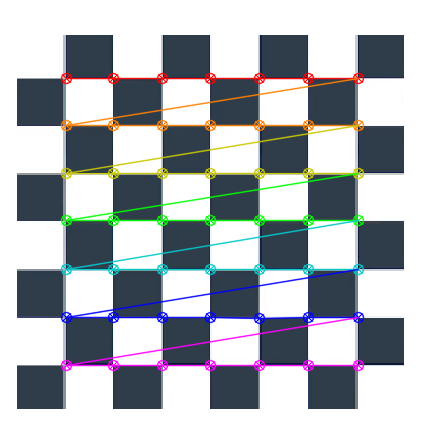

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

success, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
if success == True:
  cv2.drawChessboardCorners(img, (nx,ny), corners, success)
  cv2_imshow(img)

In [ ]:
%ls

drive/  sample_data/


In [ ]:
!git clone https://github.com/Dt-Pham/Advanced-Lane-Lines.git

Cloning into 'Advanced-Lane-Lines'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 104 (delta 4), reused 0 (delta 0), pack-reused 95
Receiving objects: 100% (104/104), 95.77 MiB | 51.21 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
%cd Advanced-Lane-Lines/

/content/Advanced-Lane-Lines


In [ ]:
import numpy as np
import glob

objpoints = []
imgpoints = []

images = glob.glob("{}/*".format("camera_cal"))
print(images)

['camera_cal/calibration10.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration9.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration1.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration5.jpg']


In [ ]:
objpoint = np.zeros((9*6,3), np.float32)
objpoint[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for image in images:
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, corners = cv2.findChessboardCorners(img, (9,6))
  if ret:
    imgpoints.append(corners)
    objpoints.append(objpoint)
  shape = (img.shape[1], img.shape[0])
  ret, mtx, dist, _,_ = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)

def undistort(distorted_img):
  return cv2.undistort(distorted_img, mtx, dist, None, mtx)

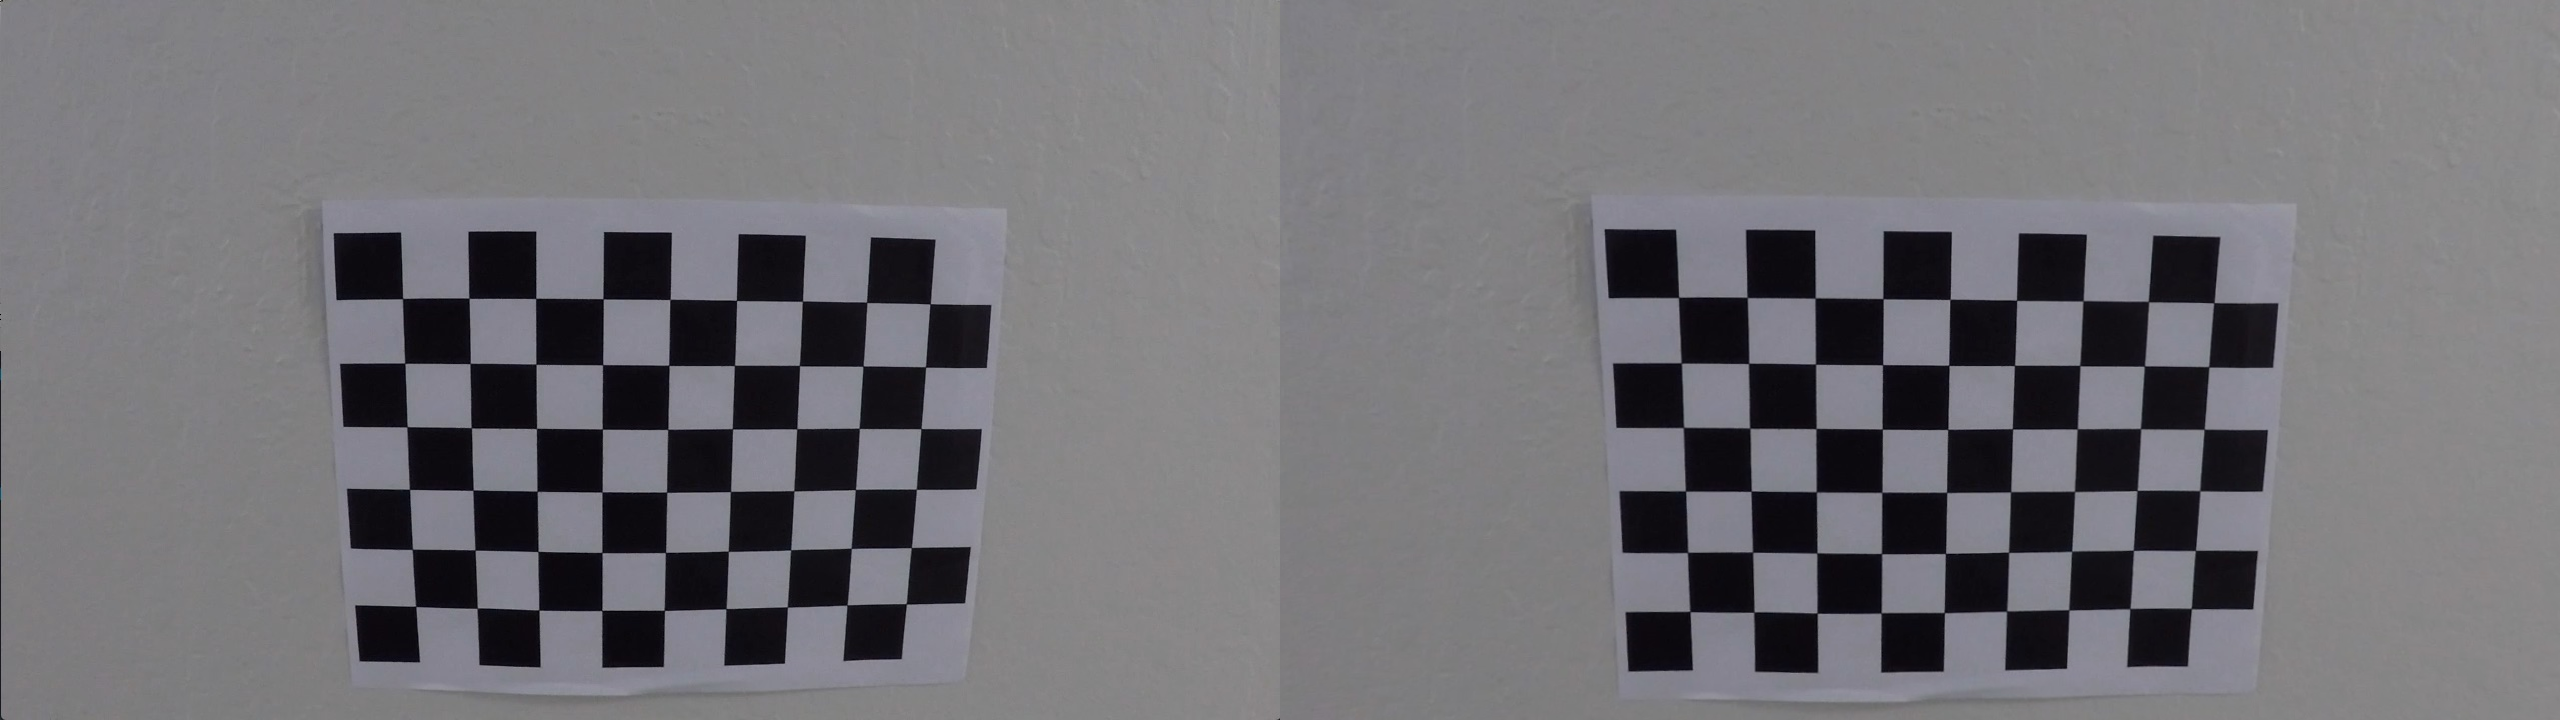

In [ ]:
img = cv2.imread("camera_cal/calibration17.jpg")
output = undistort(img)

display = np.hstack((img, output))
cv2_imshow(display)
